In [148]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [149]:
chirag = cv2.imread('assets/thumbs_up_down.jpg')
gray_img = cv2.cvtColor(chirag, cv2.COLOR_BGR2GRAY)
_,img = cv2.threshold(gray_img, 225,255, cv2.THRESH_BINARY_INV)
img = cv2.medianBlur(img, 3)



In [150]:
B=[]
starting_pixel = list(zip(*np.where(img == 255))) 
B_x = starting_pixel[0][0]
B_y = starting_pixel[0][1]
B.append(starting_pixel[0])

b_x = starting_pixel[0][0]
b_y = starting_pixel[0][1]-1

d_x = b_x - B_x
d_y = b_y - B_y

offsetTable = [(0,0),(0,-1),(-1,-1),(-1,0),(-1,1),(0,1),(1,1),(1,0),(1,-1)]
count = 1
contour = np.zeros((chirag.shape))

In [151]:
while(count<=2):
    id=0
    for i in range(9):
        if(d_x == offsetTable[i][0] and d_y == offsetTable[i][1]):
            id = i            
            break
    
    while(True):
        if(id == 8):
            id = 0       
        c_x=B_x+offsetTable[id+1][0]
        c_y=B_y+offsetTable[id+1][1]        
        if (img[c_x][c_y]!=0):
            B_x = c_x
            B_y = c_y                       
            temp = (B_x,B_y)           
            if (temp in B)==True:
                count += 1
            B.append((B_x,B_y))
            d_x = prev_x-B_x
            d_y = prev_y-B_y
            break
        prev_x = c_x
        prev_y = c_y        
        id += 1
for pixel in range(len(B)):
      contour[B[pixel][0]][B[pixel][1]] = [0,255,0]
# cv2.imread('Image', chirag)
cv2.imwrite('assets/Image_binary.png', img)
cv2.imwrite('assets/Image_contour.png', contour)
img = cv2.imread("assets/Image_binary.png")
contour = cv2.imread("assets/Image_contour.png")



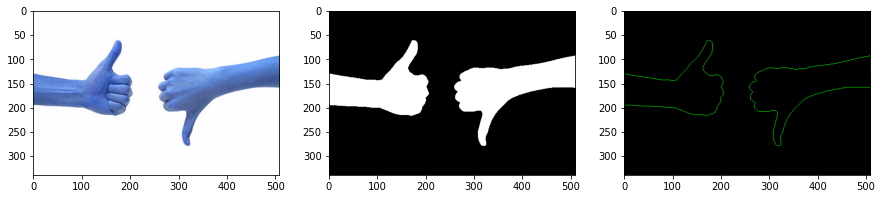

In [152]:
# plt.imshow(chirag)
# plt.imshow(img)
# plt.imshow(contour)
# plt.show()

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,3,1)
plt.imshow(chirag, cmap='gray')

# display the new image
fig.add_subplot(1,3,2)
plt.imshow(img, cmap='gray')

fig.add_subplot(1,3,3)
plt.imshow(contour, cmap='gray')

plt.show(block=True)
# cv2.waitKey(0)
# cv2.destroyAllWindows()